# Interpret video content using OpenAI and produce audio description

In [7]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video
import base64
import time
import openai
import os
import requests

In [8]:
#get key
openai.api_key = os.environ["OPENAI_API_KEY"]
secret = os.environ["OPENAI_API_KEY"]



Video loaded.
281 frames read.


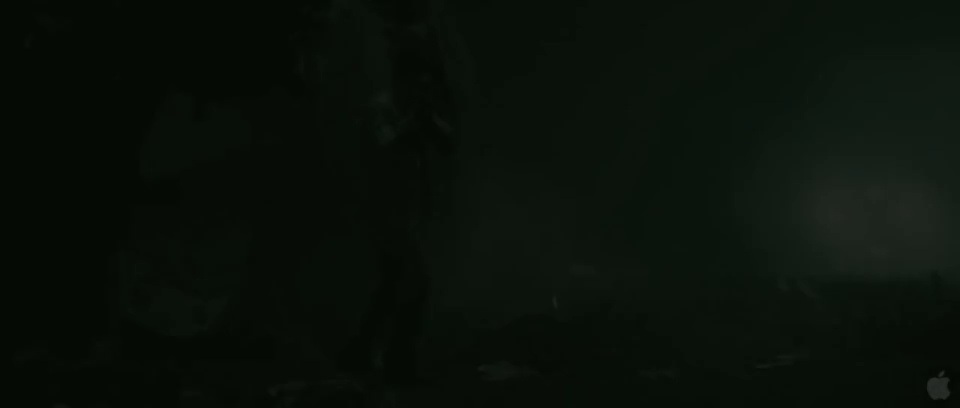

display_handle: <DisplayHandle display_id=10eba0c377ab7ae944418b190481c150>


In [9]:
# choose from the following 3 videos
# oblivion_short(540p).mp4
# thor_short(540p).mp4
# sw_last_jedi_short(540p).mp4
video =cv2.VideoCapture("data/oblivion_short (540p).mp4")
print("Video loaded.")
base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

display_handle = display(None, display_id=True)
print(f'display_handle: {display_handle}')
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)




In [12]:

PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::10]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

result = openai.chat.completions.create(**params)
print(result.choices[0].message.content)


"Buckle up for a high-octane thrill ride! 🚀 Immerse yourself in the adrenaline-fueled world of elite pilots navigating treacherous terrain and unknown dangers. From the nerve-racking calmness inside the cockpit to the heart-stopping aerial acrobatics over unforgiving landscapes, this video will make you feel like you're part of the action. Witness cutting-edge aircraft as they dance with disaster, skirt through storms, and soar to new heights of cinematic spectacle. 🌩️✈️

Prepare for a jaw-dropping journey that defies gravity and expectation. Experience every breathtaking turn, every pulse-racing dive, and the sheer power of human ingenuity pitted against the forces of nature. Don't miss out on this electrifying adventure - watch now and join the ranks of those who dare to fly beyond the horizon. #AviationThrill #EpicFlight #AdventureAwaits"

Remember to comply with any copyright guidelines or licensing requirements if the video includes copyrighted footage.


In [11]:
print(result.choices[0].message.content)

response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}",
    },
    json={
        "model": "tts-1",
        "input": result.choices[0].message.content,
        "voice": "onyx",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)

Embark on a breathtaking journey as you witness a tale of determination, skill, and courage. Immerse yourself in high-stakes action with this thrilling video that showcases state-of-the-art technology and human prowess. Watch as the protagonist gears up in futuristic attire, takes control of a cutting-edge aircraft, and expertly navigates through treacherous terrain and intense atmospheric conditions. The scenes unfold across a desolate, rugged landscape pierced by a mysterious monolith and a submerged ruin overrun by nature's fury. Feel the tension rise as the narrative plunges into darkness, hinting at an unseen danger lurking just out of sight. This exhilarating adventure will leave you on the edge of your seat, wanting more. Join the odyssey and witness the extraordinary – where the brave dare to soar!


In [ ]:
# write audio to file
with open("voiceoverThor.mp3", "wb") as f:
    f.write(audio)